Algoritmos

In [1]:
#to do
def Naive(T,S):
    N = len(T)
    M = len(S)
    for i in range(N - M + 1):
        j = 0
        while j < M:
            #print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}")
            if (T[i + j] != S[j]): 
                break
            j += 1
        if j == M:
            return True
    return False

#to do
def KMP(T,S):
  M = len(S)
  N = len(T)
  j = 0
  i = 0
  def create_table(S):
      table = [0]*M
      t = 0
      k = 1
      while k < M:
        if S[t] == S[k]:
          table[k] = t+1
          t += 1
          k += 1
        elif t == 0:
            table[k] = 0
            k += 1
        else:
            t = table[t-1]
      return table
  table = create_table(S)
  while i < N:
    #print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}")
    if S[j] == T[i]:
      i += 1
      j += 1
    if j == M:
      j = table[j-1]
      return True
    elif i < N and S[j] != T[i]:
      if j != 0:
        j = table[j-1]
      else:
        i += 1
  return False
 


#to do
def BMH_old(T, S):
    M = len(S)
    N = len(T)
    def create_table(S):
        table = dict(zip(sorted(S), [M]*N))
        tableList = list(table.keys())
        for i in range(M):
            c = S[i]
            if tableList.index(c) < len(tableList)-1:
                table[c] = M-i-1
            else:
                table[c] = M
        return table
    table = create_table(S)
    i = M-1
    while i < N:
        j = M - 1 
        k = i
        while j >= 0 and T[k] == S[j]:
            j -= 1
            k -= 1
        if j <= 0:
            return True
        i += table[T[M+i]]
    return False

#to do 2 - usar este
def BMH(T, S):
    M = len(S)
    N = len(T)
    def create_table(S):
        table = dict(zip(sorted(S), [M]*N))
        tableList = list(table.keys())
        for i in range(M-1):
            c = S[i]
            #print('i:',i,'c:',c,'S[',i,']:',S[i],'index(c):',tableList.index(c),'len(tableList)-1',len(tableList)-1)
            #print(i,M-1,S,S[i])
            if i == M-1 and c not in S[0:-1]:
                table[c] = M
            else:
                if tableList.index(c) < len(tableList):
                    table[c] = M-i-1
                else:
                    table[c] = M
        return table
    table = create_table(S)
    print(table)
    i = 0
    j = M-1
    while i < N:
        #print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}")
        #print(M-1+i)
        if M-1+i <=N and S[-1] == T[M-1+i]: # adicionado  M-1+i <=N and
            match = 0
            for j in range(M-1,-1,-1):
              if S[j] == T[j+i]:
                  match +=1
              else:
                  if T[j+i] not in S:
                    i += M
                  else:
                    i += table[T[j+i]]
                  break
              if match == M:
                  return True
        else:
            if M-1+i <=N and T[M-1+i] not in S:  # adicionado  M-1+i <=N and
                i += M
            else:
                if M-1+i <=N and M+i+table[T[M-1+i]] <= N:  # adicionado  M-1+i <=N and
                    i += table[T[M-1+i]]
                else:
                    if M+i >= N:
                        i +=1
                    else:
                        return False
    return False




#to do 2
def BMH_copia(T, S):
    M = len(S)
    N = len(T)
    def create_table(S):
        table = dict(zip(sorted(S), [M]*N))
        tableList = list(table.keys())
        for i in range(M):
            c = S[i]
            if tableList.index(c) < len(tableList)-1:
                table[c] = M-i-1
            else:
                table[c] = M
        return table
    table = create_table(S)
    i = 0
    j = M-1
    while i < N:
        #print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}")
        #print(M-1+i)
        if M-1+i <=N and S[-1] == T[M-1+i]: # adicionado  M-1+i <=N and
            match = 0
            for j in range(M-1,-1,-1):
              if S[j] == T[j+i]:
                  match +=1
              else:
                  if T[j+i] not in S:
                    i += M
                  else:
                    i += table[T[j+i]]
                  break
              if match == M:
                  return True
        else:
            if M-1+i <=N and T[M-1+i] not in S:  # adicionado  M-1+i <=N and
                i += M
            else:
                if M-1+i <=N and M+i+table[T[M-1+i]] <= N:  # adicionado  M-1+i <=N and
                    i += table[T[M-1+i]]
                else:
                    if M+i >= N:
                        i +=1
                    else:
                        return False
    return False

def BMH_ariadne(T,S):
  table = dict()
  for j in range(len(S)):
    table[S[j]]=len(S)-j-1
    if j >= len(S)-1:
      table[S[j]]=len(S)
  i=len(S)-1
  j=len(S)-1
  while i < len(T):
    print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}")
    if T[i]==S[j]:
      i-=1
      j-=1
      if j<=0:
        return True
    else:
      if T[i] in S:
        i+=table[T[i]]
      else:
        i+=len(S)
  return False


def BMH_ariadne_beto(T,S):
    M = len(S)
    N = len(T)
    def create_table(S):
        table = dict(zip(sorted(S), [M]*N))
        tableList = list(table.keys())
        for i in range(M-1):
            c = S[i]
            #print('i:',i,'c:',c,'S[',i,']:',S[i],'index(c):',tableList.index(c),'len(tableList)-1',len(tableList)-1)
            #print(i,M-1,S,S[i])
            if i == M-1 and S[i] not in S[0:-1]:
                table[c] = M
            else:
                if tableList.index(c) < len(tableList):
                    table[c] = M-i-1
                else:
                    table[c] = M
        return table
    table = create_table(S)
    i=M-1
    j=M-1
    while i < len(T):
      #print(f"i={i}, j={j}, S={S[0:j]+'-'+S[j]+'-'+S[j+1:]}, T={T[0:i]+'-'+T[i]+'-'+T[i+1:]}")
      if T[i]==S[j]:
        i-=1
        j-=1
        if j<=0:
          return True
      else:
        if T[i] in S:
          i+=table[T[i]]
        else:
          i+=len(S)
    return False


#T="jdhevehdkehghf"
#S="ghf" 


#T = "BCBADBDADBADBDSDE"
#S = "BADBDAD"

#T = "wehALAPeJrierbFtlpuLWtyCZXOxEtzcFgMPGzwhNZQWxbhSmuecCwqcUHlKFPvnUDhTQDWxbFdyvyKLfLnkEoMACWUyPhfuwKvhxdshUrpKisvaTWtpuFMZlbHpAGwvQitdtIuDLFEjvgUgcuZLZmiFySSUOVAweexMeBBhXAqCOTOceMBlVeBcVUsvmJeZRnVHXpUSBQzKsMpCACgPrHXSSwJOVFgkaZCisOlJWpNPRqTPBZthvuHGcHCfzQPzdbrVKTqiJjfELsNgRDYXOWkCIbDXuXXeXyVChNPVMsfmwBgLSONYUiRdkJVPDtQjNSFzrIuaPPYjhpWMiAyMoKcrDfnrsWuGWrokDjEvdOUTZKaUarGNbVggbMxhZmnRzxXGqNPtDRqjsnFQDlgTOgXPuTtoXwOnmnFknitIBgjjJvTMqIsbqSoNMDTuIYMSyeMdCrGBsxUyQFCrbKqcnXFXUMymBNpkugVdrtXCJqlqysUFiEZnCoQMXldsKbIsRxpXdOknjOidgaJkVRbczAjHkBFQhikGViCPJhCdNyuAaevuRifMakmphwRZpISJLsOEXeoNoeAbTGyHrtQOFqAfboFuXIcOZXwfINlSstcbgUokhKrCVNVAIiFoytEyZDfUxedvqdpiejiwxnfIHZkaATzUhfRGBAVAjxMvytWrFTSWOWDcXaSxynpWvskWfGdbbwFdFUjxbXPLETSkdtgFuViudSfJPnpfshpNRjYdClyuWJdRpfkyGyLhkxhmmuUzNuTzPUArmwgUZvbVebwZepxuePDWAemuWorOJpcjIMbeORARNqANGZCCVAbvDMCiWdBNBKbCQBTNpOWrANWTwAUyNOGvTDTVXzgASNBparMAyHgqdzdpGEZUgwesnuBkwhkgHPkPehAVBmxivuAtcpfxpqPhszPsnNejXRSeQZuVvJXIQAwnNdLbLphxBYDBoipieoOPZBzqTwkAFeqIspscOMkRTDYDgBeAGpIfZQJGUbMezUiTScsgBqZXOPyeyCmFDjwLeCNHrLHfVraXfivItiHekAPHOCsjACINXSVqsvgIdZnHxQPSeWBwESQMTediosROMmBedqiJlYjrIDYMRHFqQkBhYSRBQHIQWdfCyloKRWKDUeDLAFbONMXsMhmtxGLBQdgUxoHWmPgFIHPIIibtSjDhgwTgeuWoyloMnQgXRnGOvMkCbAJujNQUYvcfNSDtCefUltIcUvmZvHuVkLsiCeLIclLhwSjDaeIPDReedMHAASibBDfjLTLQiiFKCeQPDKZNHkfaEyFjcTHDfLJIhjMrvDgZgybaQRexszJWbVprFyCZBRWuCPtZCZOHfnKafqtGNOHhZAeEsaAFJAsShOUfSNPuKetYshiZJbCjWUclnKhDjymMbPtklsqgnKXkHPztXmtXpJYYclkciRStifEWNNhvNTsbmjqqEYwahVqPRMrrxxHNuUuzYzmbhPmIkadVVSfdRqXhSNfwVrPrQUlhtinJdBTQJTuWDueXAUxxdwgFlnygBGcqNJnqANmGkmmvUCKDPQrFDhhdLkiqJbsKmDDDsDeyuHrnxrXkgXKMsEVBSVhRvxMNQNgcrHMPDOgxvoKYVZmbqbheuDUquiwGPcwVKXvsMzCYiEvRDcPgESTvqpKrEPCjCNPaIeMjWhDGBJCMNyqvZSBbbidioviCMEAAtkhNkjEkWWgwAFspXSGNACnRTpppQORFQzGXHNwMrBgADvdTioLmqpwhoDxguBAHRuLQIshtaulGwYYDJXqdkfdTnCmhWaQFhYfLWAEJNXQLFucRkIsFMjWxLVdbvpnFdKsBkoizrOgukJdBVWAekNXxwkypdOQImTubsQMBHLgQretdFBWwUUxRmuYhjeRWAiBPPyJsFzGgHFmCDTFWKkbyfbemvDgOvDFvWeFeQTrzjvffXyedwKkzgUljxcGFVsecggDwRTadHxqzHTuoLxxjlRtUqozyGtREnjxogIFMulUFcFQyAkXDauKsaXkiFaybcDxODsoqKEpyDjAUmKoXxHnwyiiLrmXsTMhcYJELVnJRTEfVMKjUeUfLFCbWvYBioZdfRorwTLyXsyWyNkhdQBhpVFyaifcSwpavnGpKYaawvUKxECjWIiQVFQkDKwWkUzhwggVxhJWnzBQbqcRHOIncUPqKXsuXuEgiKdYzfZIXiwXkhiMYaaumcfqOcILgrdlGVjPfGjyGmDQqYfsqxxiXVUKRqXnwTqRuvTweEmPDTFiEPmsWeoSHqzoofHidqhqoCEdPzEtmdAGxeGrfOTcXJtxpzwrRjbZAtZVBlOVDhyykeDBXgGvhMovKmvGMXwLtnhojhdHTyQyTpAtHxPFVUjolYyaBxgcngfatPVPDDAhUuCwaqhJPpkyzGwlOFZycnqkLohDUqYfUdHHMHPqJVnKgncwcvhWwLedYkuHkBISOyhNNFHVaOtJLTaSsVscnrwRjWLyCsxaFKdilhpIbZshZCWNWDtZrttxsUVSzPPdsKncBcgVukuBuxnThVECwngFqSUdRlkcTsTyalegSuWrCQnDVwvlVhpMmZFQSxDWBRVmXWFMjxLtmlkxhDccMZOGlQdhlOwUgirEPwzJGrZWEIpBmTyehBDLmwQmUVYhfXQiAbovMWvjtGdcgVVuQIamrylJQKVMZrYeDcwDkHVThMlNtbTgsilqvMJLHtyoEgIMRsulnUnBBNeGQguJeuViNzhpmxoRUsvgcTMaZjugnrWhHoycIVnBSrnrskNJMnNmvHWGDfwXNqThrfxgZZwRUiXUVRQkyydyUjRzvPtyNEoQzqfwGuxJMxsufHDHjoLWtROKJdTxIVPvlOSUEldQbatdIehZYKHbUbMZERdraqRpTIQjjPoCinXCqQhbsYCaeUnjSWcWYRTZOpDxTHnTvxTWVYHrXCuMiuMGxGiCgMugxYvRVVdIJVqYoIiiwCxjcSnRnYfmpVDakMnagwKbfSeRgtUmBjhpLlzxdElARePCZiIDkpPcMlHPtOnFpPymXeAgeSAiuFdzNEjPFFeYVBjpdRyjhOgsrzhNZfhgQeBlTkWVfbITIERxrSdmaccElLZEDmWfzpqfdRBacODEcqTRuXYfjtKxQIJZNRMVGRcYRwpgwwVZyvdQOXqassHwezIvRTTgZonQFivjBctgFUJApTYVyqhjhdHFENFqJIEDhrukDcCLXWgmmFRWCbaCuffOTBwKbwCdAxUUMFlgDtfyeZEepPlJZtHYPFcGgcGxZlySnoDucaGiwMLOmCPEEdUVwBPnQWxCxqHIYljqfzNTmULnebrcVjqTKsMqimVxSvIkTlFJbpyrWTFZyXOIMrlDZtKZbulLxjbbCuzbqyTZcUshCwyYbsRJKcZSGuJKjXgyOaqagDTWoUSIEOXrcHszvYuwgEDHmCIpPJyImlYjdUtfZcxaRzVwrXzZkYZSKDakLYJuOZswBDzGAguHiKZdfETHqjgAaRsPHaWUfJgLytLiomlWzokHKnOpvztpQhoxAAIDOVrjgyynXQumAbzHOjQuVoRCOxhWdLVzUtooxXwLIdeerpmWWWxKqVvWMKmxemVbmMJaCkiWLePUBOloTMbXBoPKkSVuiFvcFQWDZXehtwWbAPVaTkyIiiYbxQrxASEhFqoiRaTqjEptGtJgEGKyxrgrvRLCpMHQmQEJfWoIpTrgtgIYXIFOkjMZUQbAZuBjTrMkECkdsYbfROHUjMxlRpVYNWfPoNhDiIICgLWHSmAnnmeAsSzLYyYsPBpkKZzgBwMqRHjFyVEuEODZBjYwWBeHkBrGDKUZzJDcCKtaqDiqkSMKmtEPiizgRRmxrtFswESvTwTuhiYalQogySSYbCtErwibDCKqpkqVvlXAXIeObkYAFEtfyLYOwcOJOeEYHWfKKKZhpTjzdvaAIoCDoVJZlBmdjSVQBwlnsTdwpXGDmRboEQTSCiQhnNeOgfhnnigHNwiZuUTsOPcxoWuPeVYYGpQRMWUverQQdGwtFvWtreleLRGKFOQTjdEsZVJBuOyCNIkraxapJYvWnXMOdQnKkSSmCpWNhvHdUcZQzBlvMNDQpjFpMDNfuRehazOYqhKTRhNactFzoSymDKJoYUlscihtHONQZuUDDXdVGhUjNigUnnaDkMjphCRxYVgPgVnvrjIEGsfuteTqpbkCpXbflCPnfxEDPhVERlUkfwceTdLYeczDsVNYygdsdYZTstdkHcogXvdUKPrIgrUGFmozzfkRMEMMacCiagEPZserFbyolORdGnjMidHmegoiPJoUnzoDwjhZPEDPVCARiYBsHXDZgYiEfDSKhZzdlEaUNMqxyXepeKlowJUDuhEBwAbRUUOXsyEsKmzxpHvFbiuMfaPmqWiUTyXFeWOFTxoCPrXydAhwlfvGrsCcBAxUwrBDUKwxpzTqssfRatHbTpaawHeeiBoKDqUAcKhZIhrlawSMDcfmLAqoGZuFmsJjRZgAQZzaqGlXWfKXTbhuBCVIJAXWMNOzENuMNZDOhjxNwYXqqIwUyHPTWaWbCZxECPAunnkWLaGQRATKvBfMyHXDPEXrqZSkuasdCLFDrBUSYypAieJhQyvwCozpJjyiakNCuChvsjGCFoiMQxDoEIBRbjQgsmRlPTOtfMuiAAvjbQqYooAyvFtmFLxSVPEjpOjMchsfIGcbgZkfQOalEdALahBaEOqjzfqtoXacCRZjRSxhAeuCSGYNOJVXbnBYxBwPyGEHGKfMbRsruQmLiZvPYOLZiQvdlVGfDszhjPMTJBSlvyIRqVuHpHqMNPMaYWAOJFuhlpnrwDwiTCPGlIlukfniLtRJzNLZftADBWPleUywcZULysypWtxVlmmMSugPGBYHpfFZZnxexOHPUwcTDBIrHpZuSzRFvmPsDHEQLhocKMGhKPrhVNvnkutPMWnpGkYuVZkVPWCZNqGNzHYSagQdPHWosvlpAGnCivgoPeINkzJHTrWvZiDfJxXbIOYwQTabmbfcqeoEmNMcBoOYSyslSpbmkeiehbAGjUQESAPcMBPfrgbokKbLUUPgrocMzvfYhIgGprZkxWQdpCOMHBWrfyuFTjMSvFlXYxdaTrHOMsMJFWClBwKSZwUGvkRXsqKCTrsDzbvihDBFBhXfVYBFkcnZsDCtbENgRCTvBJQauMMSQfLDttlqqldrTxLlvpWbqwGxxaIJqPyhzPfWqLXAMxTFFQqjvPxMIRtsAyyqEAhECnjxswcxgHYpmZrWtDQoDFvkiVnCsXXlFrqeHcqMtdiHYbCFdQbuqjoKuqBflCzlVfxtDzNzWeYOzoNtvBjkMqsvkxrzrEEqKzQhdlfNmpMRcRTknOZMuqHidvGQVGUOCTDjOsIxWxVjbwdKjfJVwlBiHosLjMJsAxXKrLbdecSBePrEDizZnTtsgfxenfoyPiKHbBDWoRELypqBRlRgGJUnsGTfSTmpIrYWmBSKlgfhAZZvWarxYRnaYuLbQiteMgrTREzehKvzFmXZqLKlWJnjhPzwHwgeTCGboiMrUXIcVAhCynNgPDPyQDwlfqdsTljYbvIzfqTzIwDQitGbupEKyFYGdcazXxgFFTtqrSwEzmAKkRGcZMoRsIhPJuKgkTjJvnFdtCwnxUxiAUmBYbTHyEpoDckWHelYIQQsDUgVjmlVnzJurNLfVXIoiaCQLFvDoHBQShqYtietRCqJuRSTXiobDqdaNcFqCwljiJwydNvJwkBoissPkzulSaEJKUMIYwTLVLhmurfEIGUFqzbHJnybMtxwZsKGBRCjCdEknWhONBDCIHJwkEqfFnFkELoeyLcHrRfEJqzLFnjrtPswqekXWLnoFcldwRbSoKOJoAMKUmxfGtvGRLwlcUFlYAxsYMlwqVhGzjuKiMRiZHUaklHhzgLbIXoeGTzvsTwuAjesehzijMZrWUzaylNAbrgIZXpeZdlXjIGWhBjoixyQsctYzTeJNeCBJXyhlgyMgcBKoDyiqdiMJgxTgxiJmZgrxOPxiHZdIBkUaKyaemtJExkMnojjccUvbqYnPXbCUmMYyxvfYLvNPvKQGEBLhiqDOnxddtDnDyQAXRVeqwmmKbubwQcgwzdyxWTLgnWyoxKuzfZIcVwsTvdGxcWvtTzXvBsotRHUVeHMxVeFVmoLLLTHSJfWlUFzRzsPQrLeILcHddkREThcyBUIzKPyGgkUoMcCQjEsdUkOTIXLlrVWrDNBZPivEPzTyEoiPsHawmQuRPWDRNKAtmHLmIGPprbqHUhbbSbcAMFzOrPXrwktEUdlXraiqKuHTMfTXHDHVwqcQtsFxwczluXDUFyuPPXXiMXDOpPUWWhvNxdDuMBaAXhPCesBunslIoGEipPEtHjeeJebyYKaEspxIOtirOyYhtOQnDzhptOZymZhGCmFrrTReXamLnIGrwZpxQqGaFyvgIbAYJiEgImhOCoVOSnNEXSQiXlwoWvRLZweMzxESudRTNbEpdpYClpzBuJBWjcCtTQBhEHwhgEHXhLDzNDndsbyWmBgvDDLwSVsfvtXCjIlancJrUvaPbLyYrmIIrYvcJVBaxYhFVpvmLYdArWaOsUfaXuEWBrMxbGjsEplEwRkGtHfNVECXoLchkNmBDqteLXMafZPskoMOvgpofQnlpUlLAnWhyIzJeKtVKvStskgpvoRTYzxqzWCBFIVUunjmMiAQbuPIBeVwabkTQIpwnegfaEivwEGwkWtaDPTGkMohrQTmQMCyKyQzQURbyNhDqCxnYeljNblbJDDbjevlaaZPqfmMCiulzHnLZNJcRwyXOCJMsvbOHfQjPCtIicQJPbbMXWWYEVKGzAQOwlmvQQgXEyieqwgmldphnTIxNkAVcdVsXreyUbqDfxUJSFxIeYCjZZiWPqFKeiIdllVDqEYUaHizoqtHkEbZVBLJJsPKXgQNPgLVnpOZnGbSqxZOuDJdEbSfJnRndLMVPpOcoXghzUjHCiEWxsdLXkxFGDOXFKDEwqsKsTHhXIRtnaqNMSBOwQKWvOCfoHHrDtNhVvYzidILEdkTdKzxRUUUXYoNeMYtNnlBwMXLdAdFVqSLkMRGHLaeVtqAnRDzbLBXRPdRYryIJroRBgAAqQERoVWvJXglXcGkCEczDvemHSVGtEMsjptGmwKNsSdmfjTftLzkYrgPlVpRilNrOZKfLbloNXVyFCEwHxVtBhFDhCpOxTFtMnzHtOdOWnNNMlwqOFEQgeZIYKKTDZlEoAifbCqzoXQCbOcVTzSBlXNqXxiCwQbfXlkKTWBBGdWhDltXDdRYGeLshVRkQpvLfZxbFLyTixofMmgQBUNIsZzxChYpnWTIMptXQTWcgprmOOBusJbnEpLVugatLIXXaeUZCcKvcGtTyXdxPVqptrgJRGdMaSoCObLaZxuJKJhrBSOfJfCRTlYPhNxbHpQwCOWlNhttHDWXXXFhtLaeeTkXQhuSMgOeRUPWIwFpduMxzVBzxJOmWexEZpkbFfhrKyNmtIcQAoebOGHlzXWNwAKkmhmIMddaBMtHIBmhDeAkIZOOBEbiwHVuParVnRyfHEznVXHeVOBgjKlQwWfMuLxQRAcJGpVYHScArgXbphqpOBvcrAbHSYNrpKlWeLnbjXBRFrwcYLZJpHmarcCnNSpRsadKYfJywgJxVkvimIYvQKNsWgZNCvCvnLrzHGJGDdTRRsOwWIzCfLxFIHJuBldlxmKHYSzTFeUiUxiiUWZuUBiLbKYsolWgHHUFSHGMzhjZAnGMVANFBCOKpMNpXvFuLbBxmpWqXXzTIOMBOeALTIZnUHhWvAmsyzPXTfLDvHzHXUzstBlVPNnBHEgqNFMrsYdHhPMtIYOOBcwxPlzHqrqBZWGcZAYyQXKHeyBebEWMuteKNMwjbslXTenOoIAQekNdwRoeKdZDTtwombEZJBTUSYBWcHxucURqHgliyCbFMulQhFPwkjCpyqEYvloMAlnMkyBielfWjhgOsRlVGQcnGrcCyAgRrXiOgNRRwrnJIulwhnsOpRSWkHwhwfDFshPFsivRZCtWewjUPrZDdYMBzBoaTPdOiQtzvbpVfUFpySdaImDWCNrLnwcfygKlABZeGVEmiiSjuGxdfbYZITwMAOMyxRIqhTBqABsTEGxbkVefmWPGJTWbvBRpdNZzhRvpAMhdJygQUZfAXpgVthAeUjtByBTOLdHweQrvylJkwdqnRQrxTOHUwpJpfJUKcCuQFzJtOCJaafJmOWfoZbJtsMztQHLmQrdTJMlyanTIxZKZLdVZoWBmbEEFnQlySFkRkpqaXvyNLQOFFuMNMhetKGhWBDFTPDzNgvQnRwNnZxXIpUpmijIEwdijeaVoeXvwtcjRpNIcRJijGOgFZifCjoqNlOWBWLzwgRCPuXrCszBKjrHeKvURHmHafpupExITLOwFYvFnlhdHJEuHxhPMLJzxpIrSuCipjkZInUGVLyexmDMJoseswplFUJdJMqwHTNGBOOztDbvLNJdDhlSNyfNQIfECtNekACpadlmZHyNgpXwXTkfWQREMSoliDZnHLCwwJgXxTktKRHQXAPVdgrUQMkITWjUFUbZbiZWUXdBpYycDzOFMQuJDXNmiuQkbDSoNXzezQJjjZDAIAYBYNiACAGlnrxBDKOxSCLEjrJfVhDhsqGrSmhQPRLAKHAcDLAQibnbcFJOahfQAwtfqgRaIfJCASTnLPFutkSTkoedaSQuJsNuneoSEpHVaCNOVlVkZOCWxSihYymsAVCwrmBrjUhTEkNVCqqitQHOxddjJjpJIDtvCIfDEDHLhJbdxXfTyZGCdpROnfvpozYhgFUndAywmcNIjEGLCnxMvlvuARhvGpXNJDRpBzyMqlXvYiwaDiWIsEwZUVMdbNEVDProHkjSCjztinowVOiZpwUdmVKhVpVZdMSCqodsVJWUaciFZCQTGriLLiDlGKxeLiMNbLiSRsfSANvKfhcQdKBpByPqTMrdqeJhwZNGyGhlupyABfIZLcWtJBlXWewvGlASrOSEWsvtduzoLRZWQrlCzlKFGdptkvDVzHjYBvRrPxazVOzTxIzXStQFGEQuKBojrXUBlDolEBKKDOwkiKsRxninxazJhJmxmnvkVwByOocLSdxWcMjHXEEFuuqCfseCIiyykLusksUvrbhziVdPSBofeOhdyVYEiGhFUYrlKIMFktzqSOchPXytHGCizwxKGtwJJwKgsdvMXnQHAshWKYNscRloLjgohrylppDLIDGJbHlkVtvLopSlebjDFDCONbnKQadYJKIVblEVndEZhpEMmUWiIuWVMaMiyKOwCrcvbJESQBtmxHozkCrjWHRMsVBoQnHYERquAZjaYFgHGcqGnqUandXWeqDlGgAfeqtNwMZuyCyJNuSrBauahLaJaHprNpaUwCbWqHaCMWoFeZHkVuuTRZTsYhQXUasjzuRQeMSeUSOpCVWbBAImbqpFneQBMmRQIweYRbyxzHgoNpWfkifrrjJIZrntVFpFMXgYfJnSmsbPiGWKRfrZjDIHmdIqImKmlYLmmVfalDqzxxFnLbkpzQQlXMFnOGsjlWDPEsvYRDORnlJuCaLhHLeutLnxSOZUASDmymJBLUdPRhcwDaDFwAjiNerrjUzyEREvcyxiRwGpzDdSipNOhTbNGncvmlDPEZtZWjKIoiOgflWJTOAgCVBpiWujcWiSTltMrhdvQYJBBzdXWdftzbIWGZqbrvYynxyBYrsrCUgWaKxNVJiKqpcAZLLaJdxXaKfSNDCBMzTrxJWGqLQuhoSPWKrrCAJAWaJkzlUdmgDFwItshLfZAfSyJXvkuWncFYgttxBkwWFCmEqpjnEKdMkCgqhtfzqXEDqUrSCHHBcZdSTZZxhDFqIuIcXERuABwuwakuCxlPwcYVnhRSgGWfZYGcmvBXyaeVlwcZKYNouYzSeodGxtgaaZXLVPToUAmaLzzBacvBLOJNcxFLnATgWYm"
#S = "QMkITWjUFUbZbiZWUXdBpYycDzOFMQuJDXNmiuQkbDSoNXzezQJjjZDAIAYBYNiACAGlnrxBDKOxSCLEjrJfVhDhsqGrSmhQPRLAKHAcDLAQibnbcFJOahfQAwtfqgRaIfJCASTnLPFutkSTkoedaSQuJsNuneoSEpHVaCNOVlVkZOCWxSihYymsAVCwrmBrjUhTEkNVCqqitQHOxddjJjpJIDtvCIfDEDHLhJbdxXfTyZGCdpROnfvpozYhgFUndAywmcNIjEGLCnxMvlvuARhvGpXNJDRpBzyMqlXvYiwaDiWIsEwZUVMdbNEVDProHkjSCjztinowVOiZpwUdmVKhVpVZdMSCqodsVJWUaciFZCQTGriLLiDlGKxeLiMNbLiSRsfSANvKfhcQdKBpByPqTMrdqeJhwZNGyGhlupyABfIZLcWtJBlXWewvGlASrOSEWsvtduzoLRZWQrlCzlKFGdptkvDVzHjYBvRrPxazVOzTxIzXStQFGEQuKBojrXUBlDolEBKKDOwkiKsRxninxazJhJmxmnvkVwByOocLSdxWcMjHXEEFuuqCfseCIiyykLusksUvrbhziVdPSBofeOhdyVYEiGhFUYrlKIMFktzqSOchPXytHGCizwxKGtwJJwKgsdvMXnQHAshWKYNscRloLjgohrylppDLIDGJbHlkVtvLopSlebjDFDCONbnKQadYJKIVblEVndEZhpEMmUWiIuWVMaMiyKOwCrcvbJESQBtmxHozkCrjWHRMsVBoQnHYERquAZjaYFgHGcqGnqUandXWeqDlGgAfeqtNwMZuyCyJNuSrBauahLaJaHprNpaUwCbWqHaCMWoFeZHkVuuTRZTsYhQXUasjzuRQeMSeUSOpCVWbBAImbqpFneQBMmRQIweYRbyxzHgoNpWfkifrrjJIZrntVFpFMXgYfJnSmsbPiGWKRfrZjDIHmdIqImKmlYLmmVfalDqzxxFnLbkpzQQlXMFnOGsjl"


#S="MhzlxKXKUCxLLnkkuREsbilRLvSuhgIKzcEbdWEWcfTNTTDaeoQKrLfCdiRxZDFTADJTgHRhhSu"
#T="YdWWmfJyYkAUxKPXzXKmMdbVTVFTSPNVmGUNjbKgOARigqBLeIJYzftwkzcjgMnaBLXvmXiICnKcdxBlhSwHncNfoHLxEbUQWCdPijhUEPqqgboXhFmJHxgeNvHuEbYDqZZvFztGIvTngtiGleXnYqJtehhgfUpQemGDzHKhDdnvYHGcQZeeCpmTVPQCjiMevrVNtCOeYEhqsAUDbkBiEHrSngPGMxUJXHEEkGkmIjrbqyTahNRICtMqxfJatGUTClzsMkobHrUVzwDhNdNAmBnwVDhNQpzGSLCeaCOgEfNlcgwdHUlwmNYeJtLfcOilfFVwkUusMgERHZsKzyqTmOblEiZGhgWVuJXMPFGbpeRPJevYfnLCNLLNbFNuOAanJGPXmmKCZgJrERkHrkgzZIXLsQiwssQdlqCIagSzenXKEUDYghiUbUPROLQXCzCIoOVTWEAUcXLBAEAJFsoyIcHRFCNvqJcLVkmeSjoHqaCJQlZWEHvglywUJLdeeigskpbuKtZBifqwbVMFdNlCRCjDDMDVLjHmhprsAhgnjuSrnAhIMYJeUOFiJgUASuQHbKFHkLaOiSECPCGyAGBgbZkzsGegJRTlTXJPlEOvEVQtOrTOfhlXmJxnxuCYUhLkSObijLCCtOnCcIHewNflPNrTWiOHvYhZYEfqzTHNkhYAzXHsRHotiLmepnWtRGrBetbGLMypNYwnVApoPYVQPdwUMFvKuajIguQwHPPbVZEJVLMUqxUxcymjuoCiDMABUoVEOBTlciXNumSqGDsdQHAgWRFqwDGwLKRoBJwpnaalJpphgHbCACreIROuFWWmrUhcGrsQbgrHhZaiNnxtcDTmxFUkXbzrBzUohCSUOSWuDJxvxIfoduQJiSysyFKTpuZHFKTnGcdHlRcgYhfCqXopRNOZiMhzlxKXKUCxLLnkkuREsbilRLvSuhgIKzcEbdWEWcfTNTTDaeoQKrLfCdiRxZDFTADJTgHRhhSu"
#S="ZiHzYbIynmfCaUjWLNIsiEWHNGBqOhWRsTchOxHHJOwkZUdgzVLKFzBoeNuWlPXAwUnHjiqoFQXXAhksYNnnGRgjbuVICybyzMyBFTAKuWTyDDTFhJseCknZcWTelbnlUwJdnvYxugOgaZhEbRwUCyBXpxhAwOxaGFSUGGoAnJxYeNbZEVAJroBJqAeFfPXHqAwdKbEgA"
#T="mXQWeANSwkJTlTedEBsLtaeUYrRSQIQvxXyEnbfiYWCmFwJdpYaKliZkZIzMcNpgDLZzQejcXCYwOLmCTAtHdooMZjiyLXGunYgJeUXxceFkrtoFBsKuJMzvMwaXshuSigFmnWGzogesyzQrPynrGQbGxLAoHlujlcSukjyHkPtJMSQVsVJObTGouoGixnDQgKfsjtPkIXaPluKNJUSqsaufZQACCoswojBnFrpGAKasgJRNtXoiBPxOuynzHmeutLhSCbgiLpUWOzPYJMoyYRzKnPlhoHUcYzKaYvtWwibvmPGEAMEzRWLPPtqfCuuTKJrIYGmysGdSDyKhFZEpDYWZGJHehRXTeMEZRvNmdkcNcvtHafnpSXidOkJHQXgfcBVDaTlcnqxkspdEpxgnVkLCZxrcUcNFpkCXEXgXbIOLrJIiSZaiXJwRmmJAppmZPeAThpMadsanlRFaFIigOlTCEEkINFvcPfUryzBEIEbgZhbQekfGSlzNMQvprFBtghrGLnicoRSvZYIMDsEkjPiLgjQJGuSJxduzZjYddrBfyAWIiRqlqUyKnCKzUBdjLEcSFrpaamqmsQRnWeWdhXgjOgdtmXzesYANJiAkuQtKpZiHzYbIynmfCaUjWLNIsiEWHNGBqOhWRsTchOxHHJOwkZUdgzVLKFzBoeNuWlPXAwUnHjiqoFQXXAhksYNnnGRgjbuVICybyzMyBFTAKuWTyDDTFhJseCknZcWTelbnlUwJdnvYxugOgaZhEbRwUCyBXpxhAwOxaGFSUGGoAnJxYeNbZEVAJroBJqAeFfPXHqAwdKbEgAQcEYEdGyRoaCYDjDOoIHFyocHrCeHplxwzJcVpYfBawgxlpzOgUmuanspadSdotJzVignwsTSFiFwIJeFwKlsPBSiMCxwoEYbFOxzCkLZkBJmrgxCRuoyeugjvXGYihRLBsRbOjXHCTfEGqpKBBnwSjwUqhKuylOuRwEyGADLasAsbVsikLWMmSOnMvLeZsYQzNRrDdQVvGINJbxMeXbAoxnnjWyIRrbFerfvhLOwheIECjvaoWzvJASCZKarmUTByZOEuQWNHzuvCvgIcEvEhXddmGzUIXCuXYcLhFdsQIYTbpnkTZSIgJkysQyRmOYyKUmWyULAzVOCQrqdGtmXNFKTihGxYxVpBCcfHPhjQsoAcuRVmUuguhoOVRhcUPmiNbBiktjaKSILFuyLCYdqCHyjbclVFiNFwXquvgOHKkWKkYecCkBpVbgbaXzTfIZBjmmRSedRuZdcTAeNJosuTDQmeTRqvLGLfLUfnRqNMTbHgImQPzVpzhdAXpqYRWZjsveoYntuvYipDkrYFVJeXZgtkeneFXGJJMtVgLzmCCDRbmhDVFNnCaBnNNytdezaYYgbaOLlCtQUpyHrhEOppyUjWcvdaJtIBqdHOxSCrTcLwSWRfTALYsVRQwbOufYNuKechZnbzWbIywSOuybjQiClBaegveYqkrqDaGdDjJhWaoVTaRcYiXyyPeCUnKXPTukEtbWHEpJYEFzkpOpqnftmeJncwTFudILJMyVAwkjpyjQjjGhchfOBhFbhWNTReQhqKsGWDGwkUSBFQmLqfiKhinZzkvvdmqpxSBfxpSbrpaWkZpBkMELCaoSPXOEsHWYiGBKdzogyBSyNpeRQyXOtZeJMxXTiTmWWkaGQhrljxEShzDcHcTNdWajmfWuOTbGRyiuQAWHuOfhdIIQdxNEoySnvzObaTzgXuCOVvhrjjhbVFEIkZNvIcCqYzVtWHHFZopVVFTPGsCIGTMXhvEkpXXOHhzsXmhvyHijUSUWnQLcyCslCkLAHWeZiCownICGRwebpHwxBNvbxIxquiyNaNlRjWaEzqMPNkiZfYHDQNSFnIODRbPVQlsESogjFRSYSqPvHxkQzXfuAAgyxqNbkfXsmrJFSaabdjCVBwUdXqXifgIrTJGaqKwwYIHVMPQEnKLQsOeJBRVuVVRgrVykPC"

#S = "ABABD"
#T = "ABABCABCABABABD"

T = 'HAdcuNQyDGzPzeIeJpALlNwgeRWchoQxzolstIXkTgghWkzrEixBJxIDyzdrSsfCiZUaOCsmFpBgdbfaIbcibwDZJkDgMtmyhWhsFMDrfpHuMQfdIAbszIorDePzovVffQeQhUHEwuZKmkzSfBBuzBBXldFRHeVxUCobbyVASjQrJOzsQWQcvqHTYeZhKRcUaDVDKZfxeNMFeHWkWCusCWoHOrpTdPgVZxERyesuCACbsSWZwIVHoVcEVbtMtDtZCahMRklTnvpjTFCUdQMtSAzGvzZeHGrLzuXojULejdDIMfNIcwYjMeJcvqxbrZfPavoRQKCEcUzdplKMiviJEuzNRHrnIiileGNVOesvuYkNfczvdTdJpLsaQAMbhgqVZZiuKladhpfaNiDgFoZzjSiBbkEDhLqKiMXrezkutniUdZdfokPICiVbIBzENLMTuTDBVtiywXLGxQmAlwMVCcEfvYmJletYGwChWAPmcPuPLvaNOFSFvqfjVNnrEpLnEGwBwjdVdJqbkGxxTCStvqNblWRbgFowgcWKzpIGaOjGOOJiNjesRlWFgGEmuoVmlDgahDWdNcXAqLxaFituQrfBBBhuaqXxQlBFCiyybJveMLjHrQcUldkLIocVOZspvsCwyWQhJHJNaoQOZxjNjGibKkLSvxDdrkmmCPzQkwtHRsmeYiKJJUSRiHPpRoQXxDcUIdtAEomPikLavdFrHhkJiYrfgcHlArMTzLXFmmoiHkJuJEobuiukkYKDfamPpVxTwPrlxFVWSgwxMqnqGqoHJJWphXwTmWHyijWQjHYcxMgZOTkSbtXmnQqhmOJJVQhMjEQwYMhzHYGYvrpbCLgjCzRgIphYRzfXQbmdPIqyXDXpoEKqKsqKEywJVvfpAeKwnEqGFgFpcjgwYlJtzkanfsDaLzkHIPLjWFgmpXThAAtnPSrYwIoSVRjBMuXltMkNRJCYQgovnaCDCDDrKQSWdXElFqRrRNdnOutPmZYPJXtGAQknEVGwrkxvRqEyYwtwtDzePvZmDhCNZMbcVSoQdcoCrViucrtYyqwAMbVXIGUgseTIufxgQgYypSYhCoThWgPeeJKiRuxMUSxSxnndRxAUUwhSkNXPKszMkVGKlwuelFiRtubLwnUNekrFnsgmemzZDWQlUFyosnJFoMnLgVtNBIYCvCCNcaAGWPPyHXsLkvTcXvCiDSsmFVveqimCfHldYyvMYOzFlmOnZodkTYZlAWHyANyXBkpHhqFtJRxsMFPzVTbtezvHrrxMYiFaLgmTqKpuXiXYXnLGqISuRtIKkEdDTbpHSbXHdkvuAAeIukuIVyYkLmohmCaHielncjsSYYWUEiWTKrtcjaDBeDuRBpnegQLtoRWYCDZTylLAoWDGAXIUxVHIrmIfBqplgDkMbcKuKOgNHtGjREuYbeCyByoZAqvAXwBCNBshZVZocXwkRKktkNYggNYeYvCfLcryKpOEIPPmBBJuIKEzKxaXapLolsBFAkxBLYkfujgShNvnHiyxqdUHAhbBiABNJsqeRmDYNZllTIaMBNADYTlHqlsuSGdxjUzqmVIRiMHOWwKxudiNYkwauhKamYIfXbdDnvGAoSsKwmpbUBDAcCRIfdHydjgBowupiHVNxlnAYfIbQEXcxoWLgLPXPFmBrAOTpmDIjIHnRweLLPmeArPMbWRVuZwmRilzxOJYtuAhGOVmCrhjaAwFEfvcGQzJShsHusnICzJNGrYvTGMJujNMtrKJILwxqNJVmqlPsutgkRafCIKjSKRSDuAWOfyPFQUFYuRQPpOuqCSltNnLXaxaVOUIqeqvNDVsDPfCKcYMhpGBykwfCOLthjFHaSIamKzmUxAyWVTAGawloprxRcLSZfIUpNGFhFgjUREZURnPHlRwYKHYXFlxDAjkSxuNVGVVeVnHsNebbkfwryxdptSyRcNwHtFTwQVktGJLTasFPWqhMeRZLUTojfzJUqzWfXGCOdTQNVtLWulNwpIJQxzmVyOsdRUNFxxoPTjkzbzdcGWbJEJXiJGMWHDkYVeiQNiTpsyRaZuUuQHcsKvnXprlGOiVdmkGEveRYzPjgLvdIiTDGlCAeCxNkJJbQIGeRtGSYCyQGkmpdTcrYJNgbOqeNFYhLQuhKAslMdvOnqlNKQnySUErlUYkbLSqUOIvHKdmNdMAPMBquwoOwXRUmnkcpGwhQgdDAbUQpgdrvnWOzyyDcXgQKOAgpbwAQohktfYmGvlhEXpDslxoIHSQfBHQnRbABSFaAyTytSmtYxlVmIgVjZokqwevMvgkvhorpWehEUKxSuCSaFJEHSgOdELbqUQJmFRMaTIlrJgPIFFYCrAYDPdVfqyDCxNvfNAbblUJNASNrxdiUCDkUDNiDXIxULklmPVqHJxWznwtZtfRUBitSNRasbpArHifkQOyXVYijgSJAoeMQexedACzyIFmOTttkfHISMKmaEiqWZTPRQyMyxVKVtFuqkXYNCvQudvPPbQdoNHpWueQsslaWUNZuYyJiYxFxJURzlGmIhqgIYllAUWHaNYaAKsSIdryskJLkvIOIIcWGHtUjkmTuNbrxtTGkfgiZTlDYGfbarCWDRMzrVuXwYwCTrpIeGatarhHFqzKPSvsePFKKUYOYxojQZSeJxgBqmabuNAYJBrpXjBEHaazokXFkRlGXTAfCfsgibAyZOYAKwDBgrkVGzdyEouijQzQNGBjzkHXgcYpQVQZLqGLStrhjLEshYWBFxbQZijGSHpJDopxiTsRFXEDegREWliMDtZDdOaDBecWuqEKZckTUTeqakUIjWVTyxRlcrUrwGhiRXaUCFQsCBUcRlJHZznImbVLFBZQZPBtgXWBDjPHHtozAUpMPkQIeEqxJcYBCqWpyQYWnGzmcNeDMKeByfcfJkYpGgxWaPGqQZYUMFtHcUzbURfCvCmQcLwMUJKVmCBRPFMlWXSeNiOzZNfcRrGtOEkbnECkvOrSCRbOJJFENZMYKFQcBJDJPdGCyohjwxOOTXgBhesTVgEWJGBcCoajCtGfsduqFFOIVfrgSGzonPZrWCyEmRXePBXuPKecaTSOoRYdcIzSvNfbUpZHZQRRbrumVlqQcCRWdBOAIBgcuzsjWQaZFkFtjXeVSRqmCMBxeCqDYxdGCDwqbUjCfHxpTQYvhiTYCFvXCyddZlmvTXzgsMrtaCjQjBuruuiMqwyNTwDrsQpYqhoWDOpJvwcuOSpsOaOAnWBlYuECamJWHOGSipKyeFPuaxtqyOjnVuODfXxvqoCfVtMytIpBCiWDaxFJgNYKfjJmYOZSbPmtQKmPaqOxnYkIjsDVCzRJLVCXcRlpPkxBtsZYlqlbkBvcsAVnmstGnfULaXfXcxzqDguhePWZEmyFRbWyvjyiLlCbVVcKrUDIZRGUegyKjPvtkRxwXjKnjjEEWenPJPYLEJOZSWYfzWVTQCrSJDnERGrGlJkJqKWmEcekhDZrmKiSLGPqywUjfgvFZehoNKprmUjfeeFrlbTXkbCNtWqXoRDhGcQRcxHdioIDJtTirluKaQmNmcbXduQsKHgIccuRuaJBhebEruxaQtiNZheaYTgKpilABIGCopVNmkSLiIYypsJSUAwvrgUwYMQTydDspOHApQYgpHAytqXeoSUJzddCMFdpeMpVCpjsQjnPnaIwxhBJHXTZoeNucIIEbYvzEoiVPNqGTXZNbdaiFlpxKMmdLZPeHUVqlCIAMTjivtfhgPHmdjcVweiZhYIAknyEksKCblUtZoyDyfQDQAyyqxifaJMEqiuzaElErXXZirfKMwPAaDEMULytFbrFyRwqaxzxbOXlEnTPqtCrERqOYRbxXCedlPgXXnWFPNUcTqnILLKXgRLlpBKRqAYbxxmEtJTIQrVtUtVWOZZAbNKXzUGiqyvCmHbSHNxBXtmlmEtBMORUHRzfBoyWmOYdyVTYnOInqHRxmmZMtTrDkDWWnyrKNTKaHOdfRztUhOnd'
S = 'nOInqHRxmmZMtTrDkDWWnyrKNTKaHOdfRztUhOnd'

#print(T.find(S)+len(S)-1,len(T))

#T = ["A","B","A","B","C","A","B","C","D","B","D","A","B","C","A","B","D","A","A","B","A","B","D","A","B","A","B","A","B","D","B","D","A","B","D"]
#S = ["A","B","A","B","D"]
#  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26
#["A","B","A","B","C","A","B","C","A","C","D","A","B","A","B","D","A","B","A","B","A","B","D","D","A","B","D"]
#                    ["A","B","A","B","D"]

#print(Naive(T,S))
#print(KMP(T,S))
print(BMH(T,S))
#print(BMH_old(T,S))
#print(BMH_ariadne_beto(T,S))

{'D': 22, 'H': 11, 'I': 37, 'K': 13, 'M': 28, 'N': 15, 'O': 2, 'R': 7, 'T': 14, 'U': 4, 'W': 20, 'Z': 29, 'a': 12, 'd': 9, 'f': 8, 'h': 3, 'k': 23, 'm': 30, 'n': 1, 'q': 35, 'r': 17, 't': 5, 'x': 32, 'y': 18, 'z': 6}
True


In [2]:
import time
import string
import random
import math

#defines the number of times each algorithm will be processed to obtain the average time
num_rounds = 20

SEQUENCE_LENGTH = 0.1
DR = dict()
#calculates the executions average time
def avgTime(func, size, debug=True):
  t = 0
  for i in range(num_rounds):  
    random.seed(size+i)
    T  = "".join( [random.choice(string.ascii_letters) for i in range(size)] )
    start = random.randint(1, size)
    end = min(start + int(size*SEQUENCE_LENGTH+1), size)
    S  = T[start:end]

    start = time.time()
    p = func(T,S)
    end = time.time()    
    t += end - start

    if debug:  
      ##add the result or check if it is the same
      if (size,i) not in DR:
        DR[(size,i)] = (p,T,S)        
      else:             
        (sp,sT,sS) = DR[(size,i)]
        if p !=sp :
          print(f"1. S={DR[(size,i)][2]}, found={DR[(size,i)][0]} and T={DR[(size,i)][1]}")
          print(f"2. S={S}, found={p} and T={T} ")
        assert p == sp
      
  return t/num_rounds


#defines the algorithms to be processed
algorithms = [Naive,KMP,BMH]

sizes = [1000,2000,3000,4000,5000]

mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting collect {i+1}")
  
  #map list size to algorithm average time
  for algorithm in algorithms:
    print('  > ', algorithm.__name__)  
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(algorithm, sizes[i], True)
  print("")

print(f"Finish data collection")

Starting collect 1
  >  Naive
  >  KMP
  >  BMH
{'A': 44, 'B': 18, 'C': 55, 'D': 14, 'F': 49, 'G': 12, 'H': 41, 'I': 40, 'J': 17, 'K': 9, 'M': 11, 'N': 2, 'O': 30, 'P': 33, 'Q': 38, 'R': 34, 'S': 26, 'T': 35, 'U': 7, 'V': 16, 'W': 21, 'X': 13, 'a': 56, 'b': 51, 'c': 6, 'd': 3, 'e': 98, 'f': 57, 'g': 28, 'h': 36, 'i': 1, 'j': 68, 'k': 47, 'l': 42, 'm': 62, 'n': 87, 'o': 23, 'p': 91, 'q': 58, 'r': 79, 't': 100, 'u': 81, 'v': 24, 'w': 10, 'x': 25, 'y': 5, 'z': 64}
{'A': 10, 'C': 19, 'D': 9, 'E': 36, 'F': 12, 'H': 5, 'I': 44, 'J': 8, 'K': 23, 'L': 21, 'M': 74, 'N': 31, 'Q': 24, 'R': 4, 'S': 1, 'T': 7, 'U': 66, 'W': 35, 'X': 68, 'Z': 14, 'a': 27, 'b': 39, 'c': 34, 'd': 18, 'e': 26, 'f': 20, 'g': 6, 'h': 2, 'i': 17, 'k': 59, 'l': 52, 'n': 61, 'o': 25, 'r': 22, 's': 55, 'u': 47, 'v': 49, 'x': 15, 'z': 42}
{'A': 43, 'C': 67, 'D': 3, 'E': 39, 'F': 79, 'H': 36, 'I': 7, 'J': 45, 'K': 74, 'L': 14, 'M': 1, 'N': 99, 'O': 11, 'P': 65, 'Q': 5, 'R': 18, 'S': 2, 'T': 10, 'U': 27, 'V': 23, 'W': 15, 'X': 

AssertionError: ignored

Gráfico

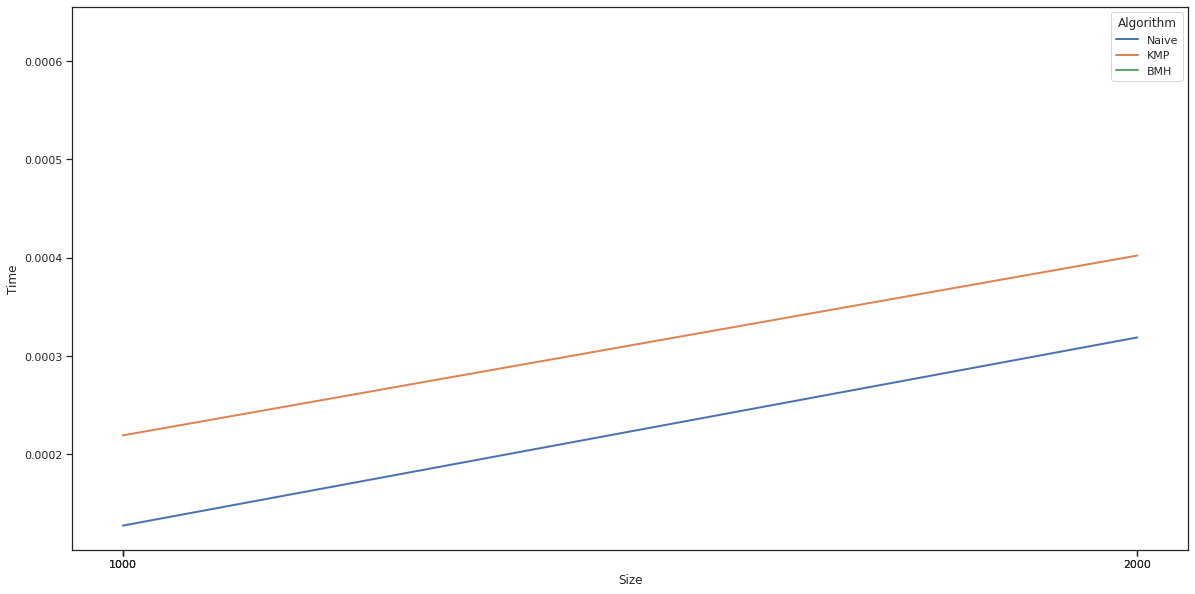

<Figure size 1440x720 with 0 Axes>

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient='index', columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

#Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

#Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

chart = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)

#plt.yscale('log')
fig = plt.figure()
chart.set(xticks=[i for i in df.Size])
plt.show()